## Loading the Data 

In [29]:
import pandas as pd
import numpy as np

dataset=pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-04-28.xlsx")
#X=dataset[['dateRep','day','month','year','deaths','countriesAndTerritories','countryterritoryCode','popData2018','continentExp']]
dataset.insert(1, "just_numbers", [x for x in range(13623)], True)
X=dataset.iloc[5806:5925, 1:2].values

#y=dataset[['cases']]
y=dataset.iloc[5806:5925, 5].values




In [30]:
y=y[::-1]

### Fitting The Model to the dataset

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression(normalize=True)
lin_reg_2.fit(X_poly, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## Plotting the curve on the training set

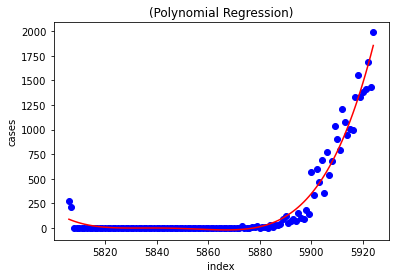

In [65]:
import matplotlib.pyplot as plt



plt.scatter(X, y, color = 'blue')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'red')
plt.title('(Polynomial Regression)')
plt.xlabel('index')
plt.ylabel('cases')
plt.show()



### Calculating the predictions for the next 17 days(29th April to 15th May)

In [66]:
cs=np.zeros((17,1))
for i in range(17):
    cs[i][0]=lin_reg_2.predict(poly_reg.transform([[5925+i]]))

### Plotting the growth over next 17 days  

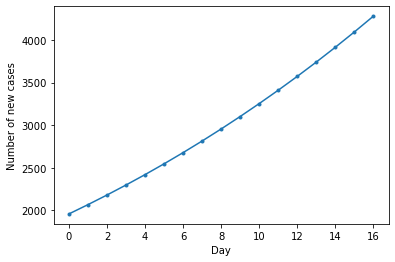

In [67]:
y_d=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.xlabel('Day')
plt.ylabel('Number of new cases')
plt.plot(y_d,cs,marker='.')

In [68]:
new=np.sum(cs)

In [74]:
tmp=np.sum(cs[0:9])

In [75]:
tot=new+29435

In [76]:
print("The total number of cases on 15th may as  predicted will be "+str(round(tot)))
print("The number of new cases predicted on 15th may will be "+ str(int(cs[16])))

The total number of cases on 15th may as  predicted will be 80714.0
The number of new cases predicted on 15th may will be 4277


### Verifying the predictions midway

In [77]:
midw=tmp+29435

In [79]:
print("The original number of cases as per may 7th in India are 53045")
print("The total number of predicted cases are "+ str(int(midw)))

The original number of cases as per may 7th in India are 53045
The total number of predicted cases are 51357


In [80]:
pip install pandoc

  Created wheel for pandoc: filename=pandoc-1.0.2-py3-none-any.whl size=19996 sha256=62fd41d2ad6790a3e17499f952dd56c113871870e43f96c8638b79093822060d
  Stored in directory: c:\users\shivraj\appdata\local\pip\cache\wheels\a4\b9\34\3e82b9444401c2199d721240a388499a262d2e2ad37f6f3fa7
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
